In [16]:
!python get_grad.py --model=norm --random-seed=10 --batch-size=32 --prefix=cifar100_50_32
!python get_grad.py --model=norm2 --random-seed=10 --batch-size=32 --prefix=cifar100_50_32
!python get_grad.py --model=doublenorm --random-seed=10 --batch-size=32 --prefix=cifar100_50_32
!python get_grad.py --model=doublenorm2 --random-seed=10 --batch-size=32 --prefix=cifar100_50_32
!python get_grad.py --model=zerocenter --random-seed=10 --batch-size=32 --prefix=cifar100_50_32
!python get_grad.py --model=zerocenter2 --random-seed=10 --batch-size=32 --prefix=cifar100_50_32

Set manual seed : 10
==> Preparing data..
datasets : CIFAR100, batch_size : 32
Files already downloaded and verified
Files already downloaded and verified
==> Building model..
num_classes :  100
epoch 1 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 1 done
epoch 2 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 2 done
epoch 3 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 3 done
epoch 4 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 4 done
epoch 5 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 5 done
epoch 10 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 10 done
epoch 20 loaded batch_size : 32
step 0 finished
step 1 fini

step 3 finished
step 4 finished
epoch 2 done
epoch 3 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 3 done
epoch 4 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 4 done
epoch 5 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 5 done
epoch 10 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 10 done
epoch 20 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 20 done
epoch 30 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 30 done
epoch 40 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished
step 3 finished
step 4 finished
epoch 40 done
epoch 50 loaded batch_size : 32
step 0 finished
step 1 finished
step 2 finished

In [17]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [18]:
dir_path = 'cifar100_50_32'
dir_names = os.listdir(dir_path)

In [19]:
stats = OrderedDict()

for name in dir_names:
    model = name.split('_')[0]
    
    try:
        stats[model] = torch.load(os.path.join(dir_path, name, 'grads.stats'))
    except:
        pass

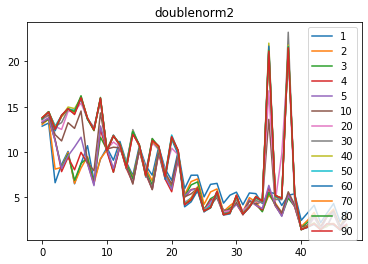

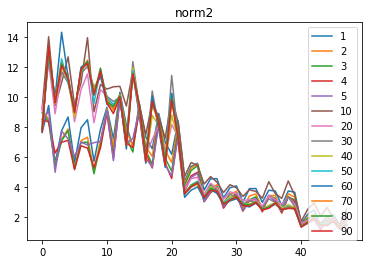

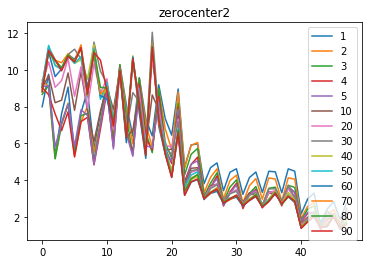

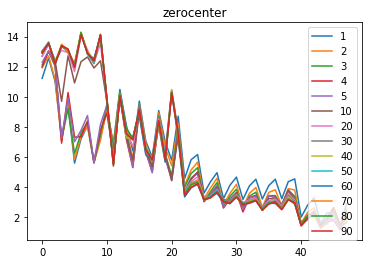

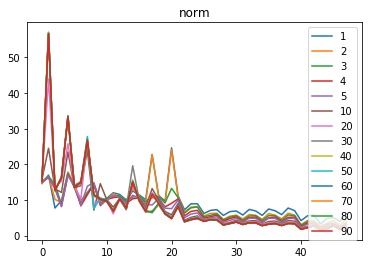

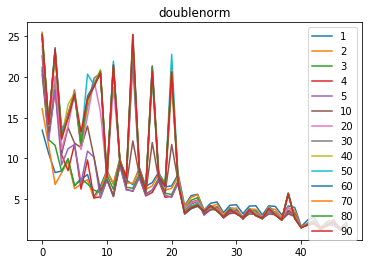

In [29]:
key = 'forwards_cond'
for model in stats:
    for epoch in stats[model]:
        results = []
        for l in stats[model][epoch][key]:
            if len(stats[model][epoch][key][l]) > 0:
                singulars = torch.tensor(stats[model][epoch][key][l]).cpu().numpy()
                median = singulars[:, 1] - singulars[:, 0]
                median = np.median(median)
                results.append(median)
    
        plt.plot(results, label=epoch)
    plt.legend()
    plt.title(model)
    plt.show()

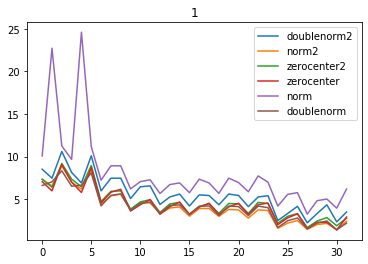

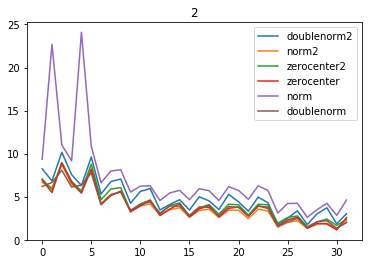

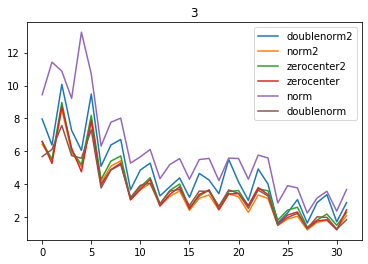

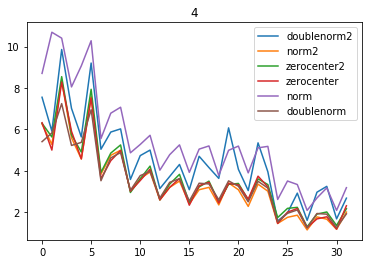

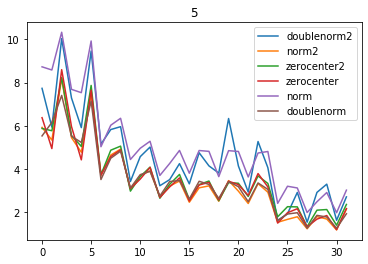

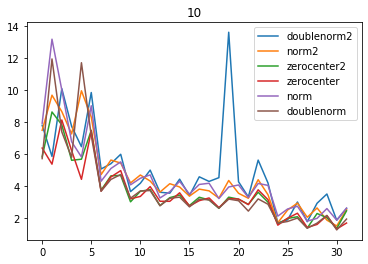

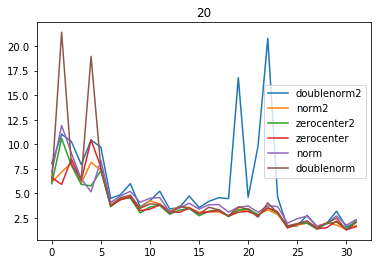

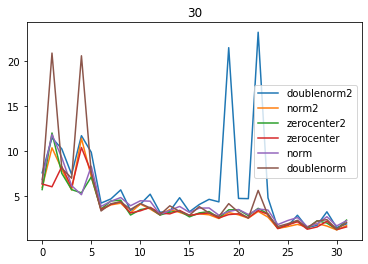

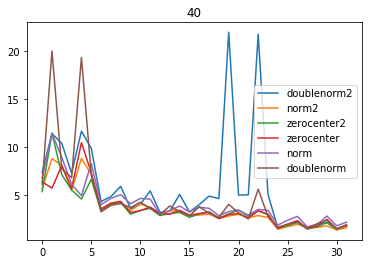

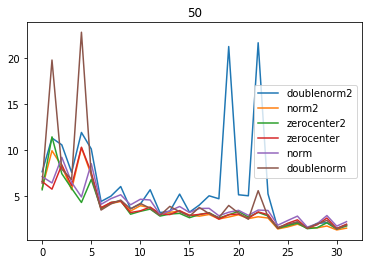

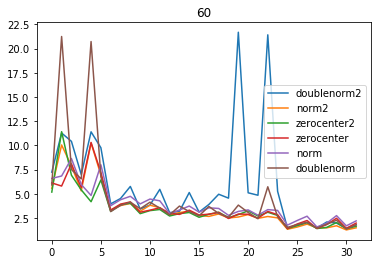

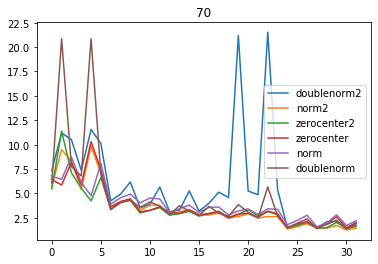

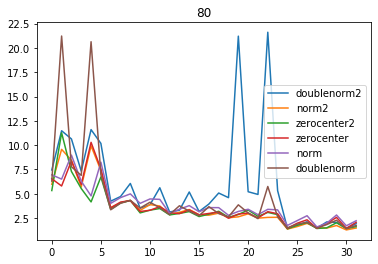

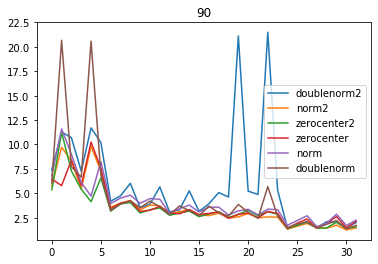

In [31]:
key = 'forwards_cond'
for epoch in stats[model]:
    for model in stats:
        results = []
        i = 0
        for l in stats[model][epoch][key]:
            if len(stats[model][epoch][key][l]) > 0 and i > 15:
                singulars = torch.tensor(stats[model][epoch][key][l]).cpu().numpy()
                median = singulars[:, 1] - singulars[:, 0]
                median = np.median(median)
                results.append(median)
            i+=1
        plt.plot(results, label=model)
    plt.legend()
    plt.title(epoch)
    plt.show()

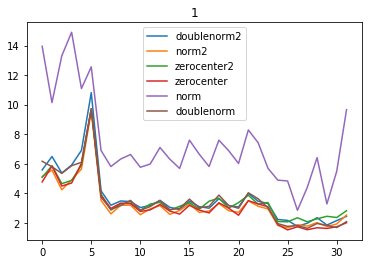

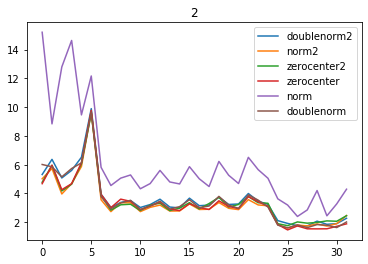

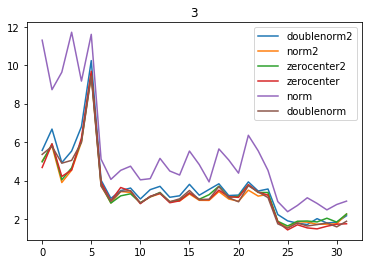

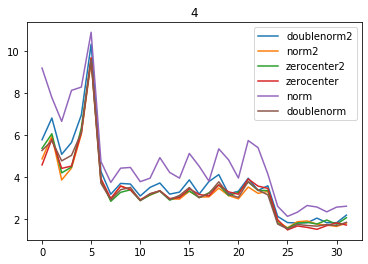

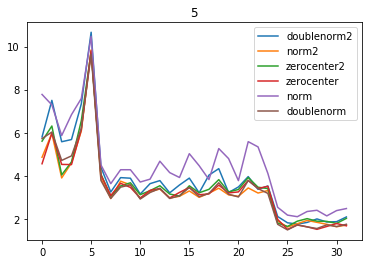

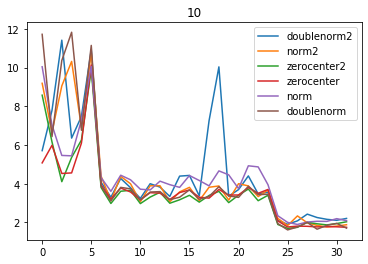

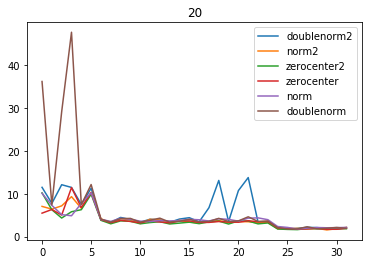

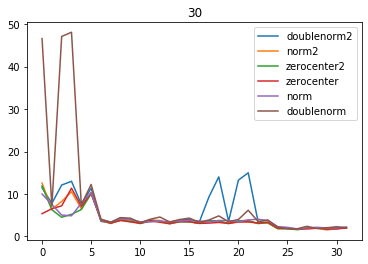

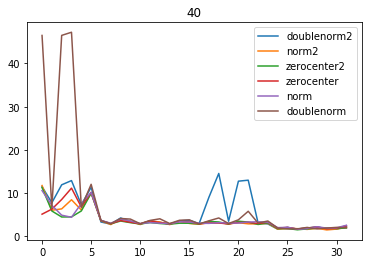

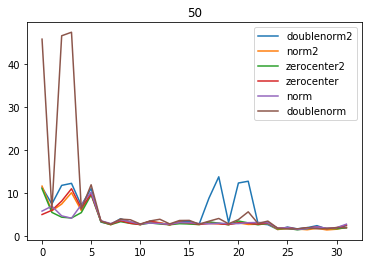

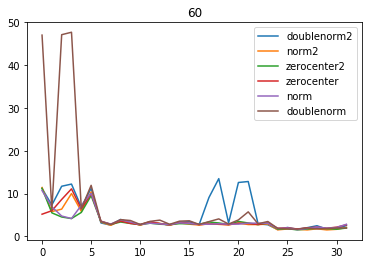

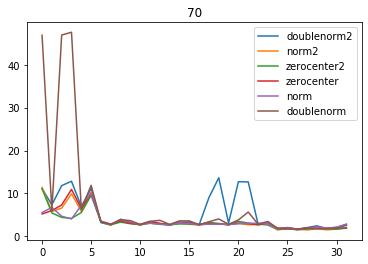

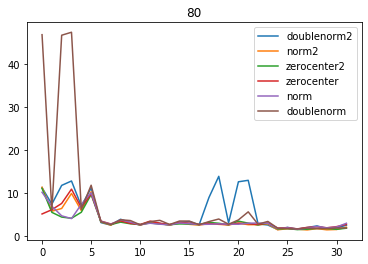

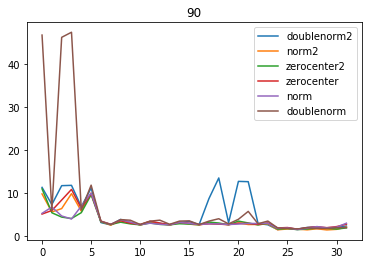

In [33]:
key = 'backwards_cond'
for epoch in stats[model]:
    for model in stats:
        results = []
        i = 0
        for l in stats[model][epoch][key]:
            if len(stats[model][epoch][key][l]) > 0 and i > 15:
                singulars = torch.tensor(stats[model][epoch][key][l]).cpu().numpy()
                median = singulars[:, 1] - singulars[:, 0]
                median = np.median(median)
                results.append(median)
            i+=1
        plt.plot(results, label=model)
    plt.legend()
    plt.title(epoch)
    plt.show()

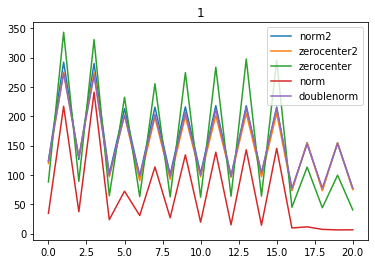

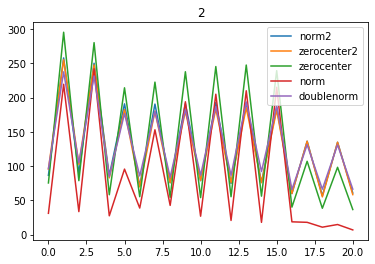

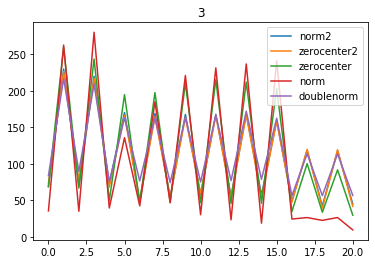

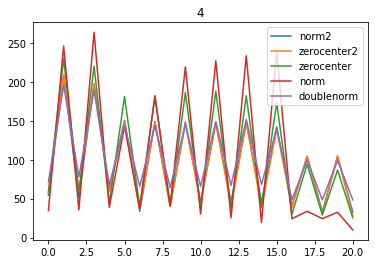

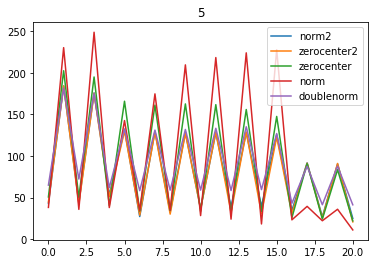

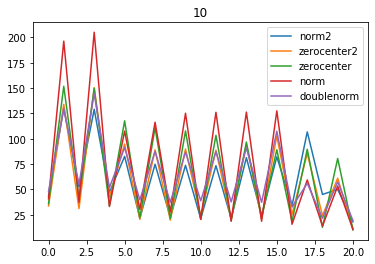

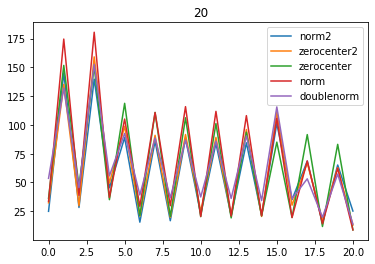

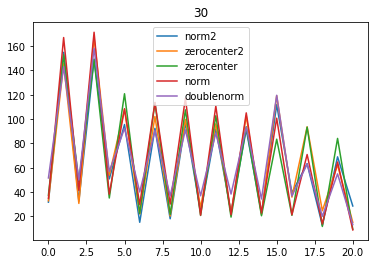

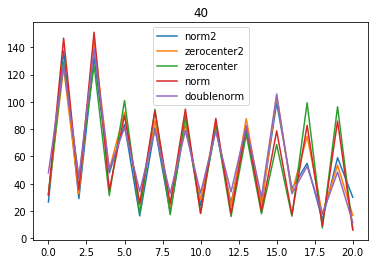

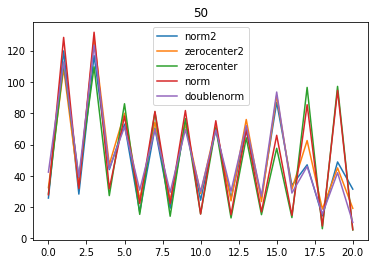

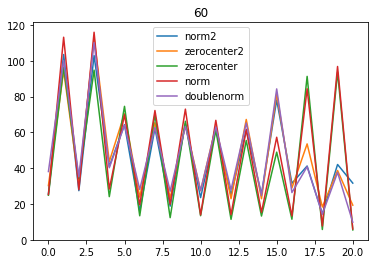

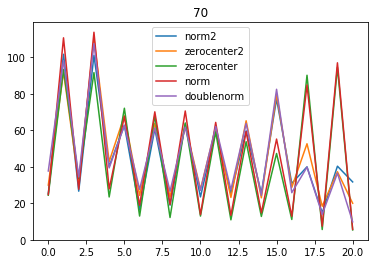

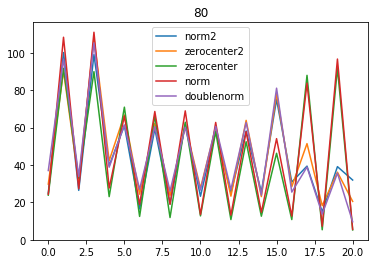

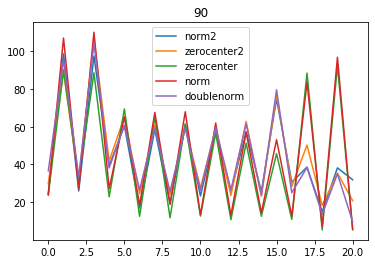

In [15]:
key = 'forwards_fbnorm'
for epoch in stats[model]:
    for model in stats:
        if model == 'doublenorm2':
            continue
        results = []
        i = 0
        for l in stats[model][epoch][key]:
            if len(stats[model][epoch][key][l]) > 0 and i > 15:
                median = torch.cat(stats[model][epoch][key][l]).cpu().numpy()
                median = np.median(median)
                results.append(median)
            i+=1
        plt.plot(results, label=model)
    plt.legend()
    plt.title(epoch)
    plt.show()

In [34]:
A = torch.randn([10, 4, 4])